# Objectives - Using Python for MRI with NiBabel
- The goal of this section is to get familiar with loading, manipulating, visualizing brain MR images in Python.
- Looking at the anatomy of the NIfTI
  

## Explore [NiBabel](https://nipy.org/nibabel/) package

### NIfTI data

#### For volumetric data, NiBabel works with data stored in the Nifti structure.

The NifTi data is the standard way of sharing data in neuroimaging research. Three main components are:
- [header](https://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image such as image dimensions, data type, slice duration, etc. 
  `img.header`
- data: raw data of the image `img.get_fdata()`
- [affine](https://nipy.org/nibabel/coordinate_systems.html): a transformation matrix that maps the image data in array to real-world coordinate positions of the brain `img.affine`

### Niimg-like objects

Niimg: A Niimg-like object can be one of the following:

- A string with a file path to a Nifti image
- A SpatialImage from nibabel, i.e., an object exposing the get_data() method and affine attribute, typically a Nifti1Image from nibabel.


### Load and inspect the images in `nibabel`

In [76]:
import nibabel as nib

Use `load()` function to creat a NiBabel image object from the path to a Nifti file.

In [77]:
t1_img = nib.load('nii/dcm_anat_ses-01_T1w_20190219111436_5.nii.gz')

In [78]:
t1_img

In [79]:
print(t1_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (192, 256, 256)
affine:
[[ 8.99742126e-01  1.05651410e-03  2.05146018e-02 -9.00501099e+01]
 [-7.48920813e-03  8.19935203e-01  2.57255703e-01 -1.43966370e+02]
 [-2.01671515e-02 -2.57352889e-01  8.19709778e-01 -7.67913361e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
c

### 1. Header

In [80]:
t1_header = t1_img.header

In [81]:
print(t1_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.1;Time=112922.273;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.15146269
quatern_c       : 0.011705771
quatern_d       : -0.0024157318
qoffset

`t1_header` is a Python dictionary; key value pairs

In [82]:
t1_header.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [83]:
t1_header['pixdim']

array([1.        , 0.90000004, 0.859375  , 0.859375  , 2.3       ,
       0.        , 0.        , 0.        ], dtype=float32)

#### Voxel resolution is (0.9, 0.86, 0.86) and TR is 2.3

In [84]:
t1_header.get_zooms()

(0.90000004, 0.859375, 0.859375)

### 2. Image data

In [85]:
t1_data = t1_img.get_fdata()
t1_data

array([[[ 4.,  7.,  3., ...,  3.,  3.,  0.],
        [ 1.,  6.,  2., ...,  2.,  4.,  0.],
        [ 4.,  4.,  2., ...,  6.,  5.,  0.],
        ...,
        [ 6.,  1.,  9., ...,  3.,  6.,  0.],
        [ 2.,  3.,  6., ...,  7.,  2.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 4.,  5.,  0., ...,  3.,  1.,  0.],
        [ 2.,  1.,  8., ...,  4.,  1.,  0.],
        [ 5.,  1.,  8., ...,  3.,  4.,  0.],
        ...,
        [10., 19.,  2., ...,  0.,  2.,  0.],
        [ 5.,  3.,  3., ...,  3.,  4.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  2.,  3., ...,  2.,  1.,  0.],
        [ 2.,  4.,  9., ...,  2.,  8.,  0.],
        [ 7.,  7.,  9., ...,  4.,  4.,  0.],
        ...,
        [ 1.,  2.,  9., ...,  1.,  0.,  0.],
        [ 5.,  8.,  7., ...,  2.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 7.,  2.,  4., ...,  1.,  3.,  0.],
        [ 7.,  4.,  5., ...,  3.,  4.,  0.],
        [ 7.,  3.,  9., ...,  3.,  3.,  0.

In [86]:
type(t1_data)

numpy.ndarray

In [87]:
t1_data.ndim

3

In [88]:
t1_data.shape

(192, 256, 256)

#### Count the number of voxels?

In [89]:
t1_data.dtype

dtype('float64')

This tells us that each element in the array (or voxel) is a floating-point number.

In [90]:
# Voxel intensity at coordinates (10, 20, 3)
t1_data[9, 19, 2]

8.0

#### Slicing the data -  x

In [91]:
x_slice = t1_data[100, :, :]

In [92]:
x_slice.shape

(256, 256)

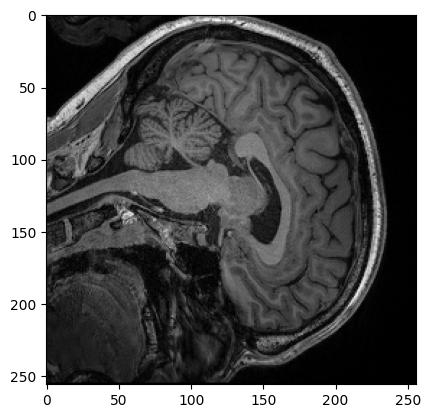

In [93]:
import matplotlib.pyplot as plt

plt.imshow(x_slice, cmap='Greys_r')

#### Slicing the data - z 

In [94]:
z_slice = t1_data[:, :, 100]

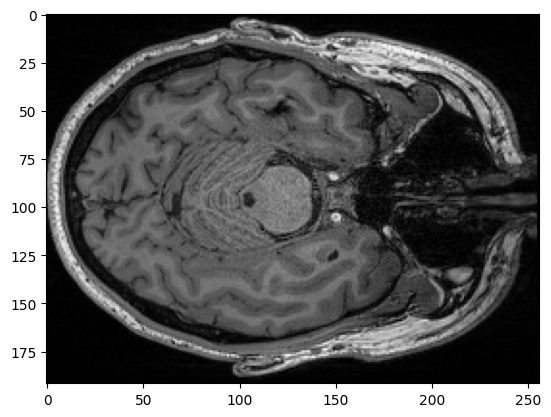

In [95]:
plt.imshow(z_slice, cmap='Greys_r')

<OrthoSlicer3D: nii/dcm_anat_ses-01_T1w_20190219111436_5.nii.gz (192, 256, 256)>

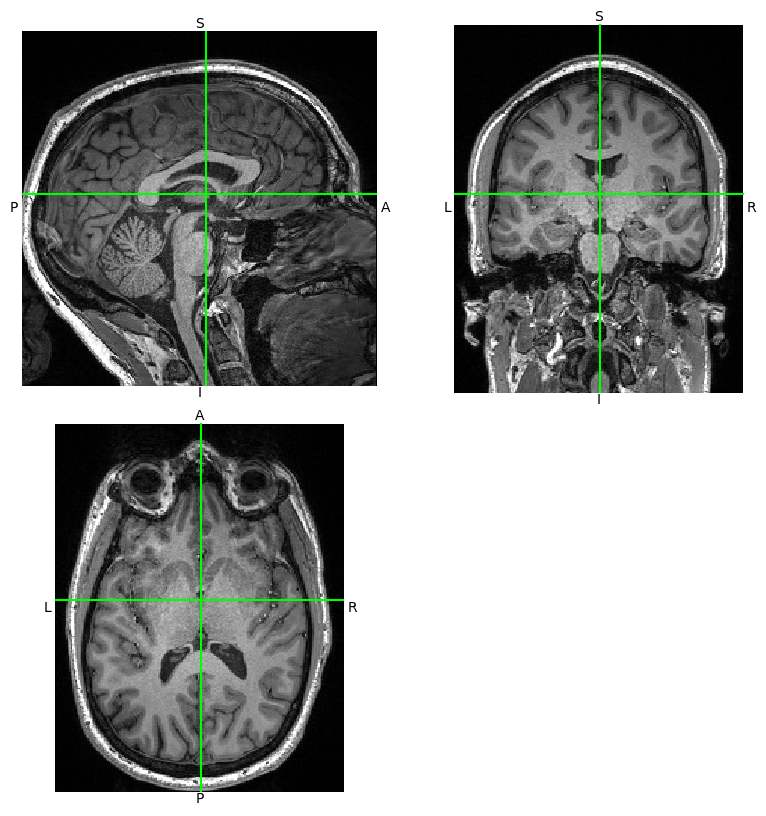

In [96]:
t1_img.orthoview()

### 3. Affine

In [97]:
affine = t1_img.affine

In [98]:
affine

array([[ 8.99742126e-01,  1.05651410e-03,  2.05146018e-02,
        -9.00501099e+01],
       [-7.48920813e-03,  8.19935203e-01,  2.57255703e-01,
        -1.43966370e+02],
       [-2.01671515e-02, -2.57352889e-01,  8.19709778e-01,
        -7.67913361e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

The affine is a 4 x 4 numpy array. This describes the transformation from the voxel space (indices [i, j, k]) to the reference space (distance in mm (x, y, z)).

In [99]:
nib.aff2axcodes(affine)

('R', 'A', 'S')

In [100]:
nib.affines.voxel_sizes(affine)

array([0.89999928, 0.85937498, 0.85937504])

### Manipulating and Saving the images

In [101]:
import numpy as np
manipulated = ((t1_data - t1_data.min()) * 255. / (t1_data.max() - t1_data.min())).astype(np.uint8)

In [102]:
manipulated.max()

255

In [103]:
manipulated.dtype

dtype('uint8')

In [104]:
manipulated_img = nib.Nifti1Image(manipulated, affine=t1_img.affine, header=t1_img.header)


In [105]:
manipulated_img

<OrthoSlicer3D: (192, 256, 256)>

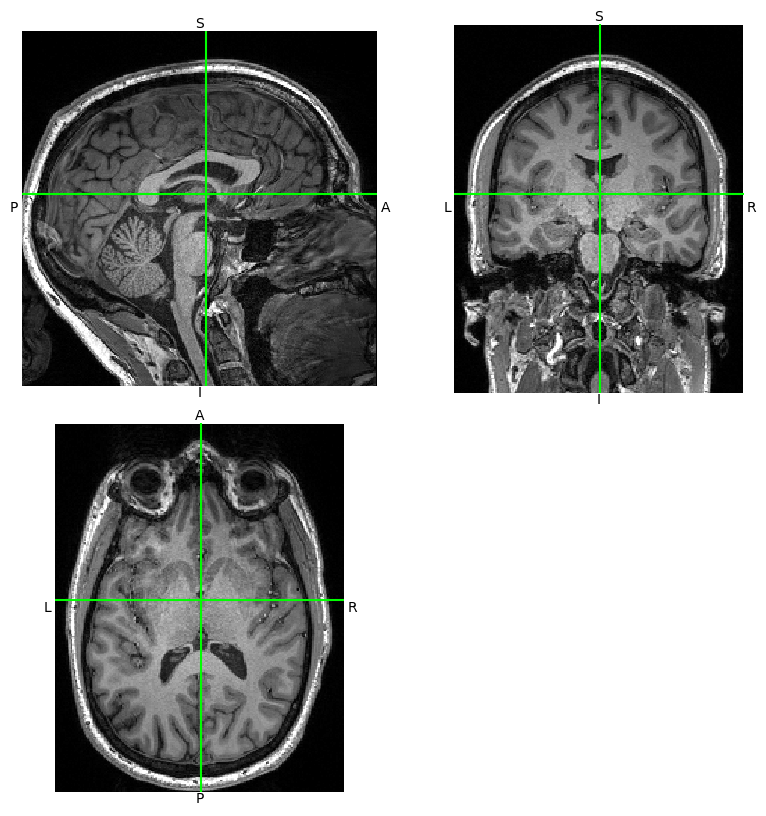

In [106]:
manipulated_img.orthoview()

In [107]:
nib.save?

Signature: nib.save(img: 'FileBasedImage', filename: 'FileSpec', **kwargs) -> 'None'
Docstring:
Save an image to file adapting format to `filename`

Parameters
----------
img : ``SpatialImage``
   image to save
filename : str or os.PathLike
   filename (often implying filenames) to which to save `img`.
\*\*kwargs : keyword arguments
    Keyword arguments to format-specific save

Returns
-------
None
File:      ~/miniconda3/envs/medsam/lib/python3.10/site-packages/nibabel/loadsave.py
Type:      function